<a href="https://colab.research.google.com/github/MrMazagngy/EDA_Of_The_Brazilian_E_Commerce_Dataset/blob/main/EDA_Of_The_Brazilian_E_Commerce_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`In this notebook , I did an Exploratory Data Analysis(EDA) plus some predictions of the (Brazilian E-Commerce Public Dataset by Olist) on  Kaggle by answering the following questions : `


**1:** Top 10 cities with most number of purchases


**2:** Who are the top 5 best sellers


**3:** Top 5 product + Top 5 categories

**4:** Payment types used

**5:** average order value by week days

**6:** Difference in estimated & delievery times

**7:** customer segmentation

**8:** sales predictions (In Progress)


In [61]:
 ! pip install -q kaggle

In [ ]:
#Following cells just to import the dataset from Kaggle
from google.colab import files 
files.upload()

In [ ]:
! mkdir ~/.kaggle 

In [64]:
 ! cp kaggle.json ~/.kaggle/

In [65]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d olistbr/brazilian-ecommerce

In [ ]:
!unzip \*.zip  && rm *.zip

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

customers_dataset = pd.read_csv('olist_customers_dataset.csv')
geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv')
order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv')
order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv')
orders_datase = pd.read_csv('olist_orders_dataset.csv')
products_datase = pd.read_csv('olist_products_dataset.csv')
sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation_datase = pd.read_csv('product_category_name_translation.csv')


**Exploring Dataset**

In [71]:
customers_dataset.isnull().sum()
order_items_dataset.isnull().sum()
order_payments_dataset.isnull().sum()
orders_datase.isnull().sum()
sellers_dataset.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [72]:
#filter order_payments_dataset and check how many values are above 1000
order_payments_dataset.sort_values(by='payment_value', ascending=False)
order_payments_filtered = order_payments_dataset[order_payments_dataset['payment_value'] > 1000]['payment_value'].value_counts()
order_payments_filtered

1479.51    5
2026.54    5
1471.51    4
1232.85    4
1149.83    4
          ..
1738.17    1
1055.86    1
2022.33    1
1830.99    1
2616.00    1
Name: payment_value, Length: 1023, dtype: int64

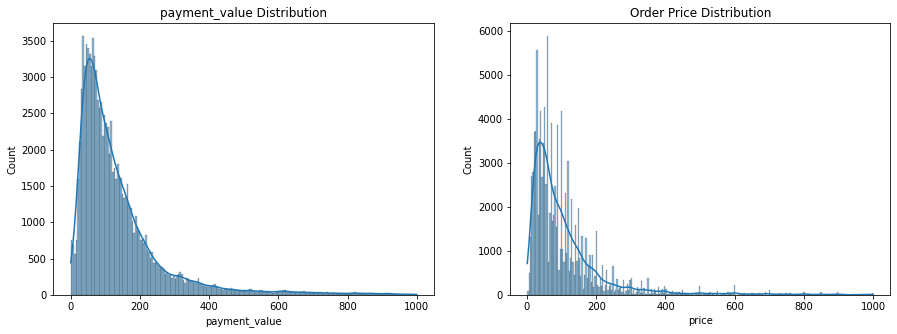

In [73]:
# Since only few values are above 1000 in both [payment_value] & [order_price] ; we only visualize values less than 1000
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

order_payments_less_1000 = order_payments_dataset[order_payments_dataset['payment_value'] < 1000]
sns.histplot(data=order_payments_less_1000, x="payment_value", kde=True,ax=axes[0])
axes[0].set_title('payment_value Distribution')

order_items_less_1000 = order_items_dataset[order_items_dataset['price'] < 1000]
sns.histplot(data=order_items_less_1000, x="price", kde=True,ax=axes[1])
axes[1].set_title('Order Price Distribution')

plt.show()


# Question 1 : 
**Top 10 cities with most number of purchases**


In [74]:
top_10_cities = customers_dataset.groupby('customer_city').count().reset_index().sort_values(by='customer_id').tail(10)
top_10_cities

customer_city  ...  customer_state
3428  sao bernardo do campo  ...             938
1529              guarulhos  ...            1189
3247               salvador  ...            1245
2964           porto alegre  ...            1379
707                campinas  ...            1444
1143               curitiba  ...            1521
558                brasilia  ...            2131
453          belo horizonte  ...            2773
3155         rio de janeiro  ...            6882
3597              sao paulo  ...           15540

[10 rows x 5 columns]

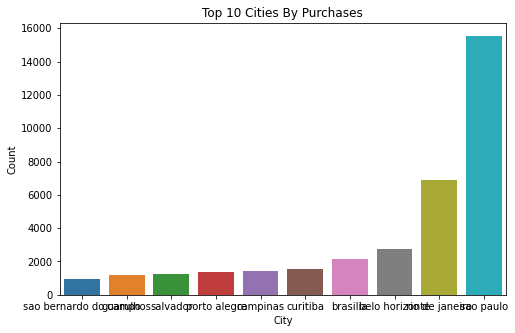

In [75]:
rcParams['figure.figsize'] = 8,5
sns.barplot(x="customer_city", y="customer_id", data=top_10_cities).set_title('Top 10 Cities By Purchases')
plt.xlabel("City")
plt.ylabel("Count")
plt.show()


# Question 2 : 
**Who are the top 10 sellers?**

Text(0.5, 1.0, 'Top 10 sellers')

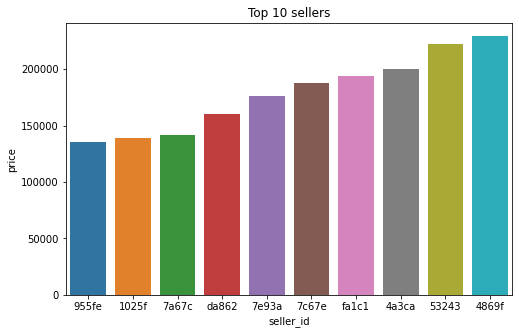

In [76]:
#Shortren seller ids for easier visualization 
order_items_dataset['seller_id'] = order_items_dataset['seller_id'].apply(lambda x : x[:5] )
top_10_sellers = order_items_dataset.groupby('seller_id').sum().sort_values(by='price').reset_index().tail(10)

rcParams['figure.figsize'] = 8,5
sns.barplot(x="seller_id", y="price", data=top_10_sellers).set_title('Top 10 sellers')


# Question 3 : 
**A. What Are The TOP 5 Most Bought Product Categories**


Text(0.5, 1.0, 'TOP 5 Most Bought Product Categories')

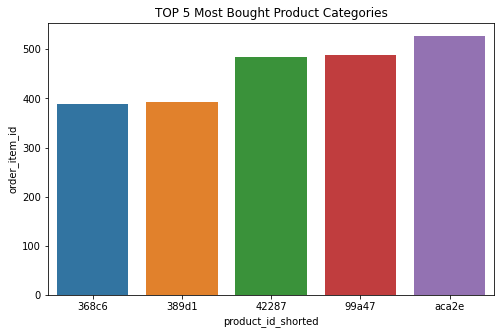

In [77]:
order_items_dataset['product_id_shorted'] = order_items_dataset['product_id'].apply(lambda x : x[:5] )
top_5_categories = order_items_dataset.groupby('product_id_shorted').count().sort_values('order_item_id').reset_index().tail(5)

rcParams['figure.figsize'] = 8,5
sns.barplot(x="product_id_shorted", y="order_item_id", data=top_5_categories).set_title('TOP 5 Most Bought Product Categories')



**B. What Are The TOP 5 Most Bought Products**

Text(0.5, 1.0, 'TOP 5 Products ')

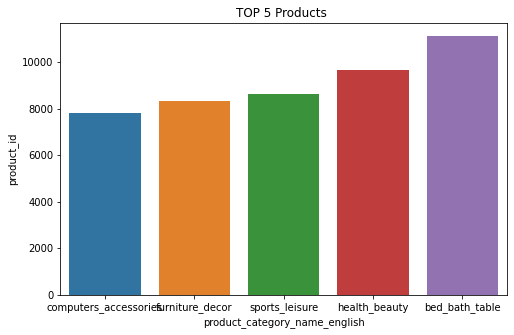

In [78]:
order_product=pd.merge(order_items_dataset,products_datase,on='product_id',how='left')
products_english_names = pd.merge(order_product,product_category_name_translation_datase,on='product_category_name',how='left')
TOP_5_products = products_english_names.groupby('product_category_name_english').count().sort_values('product_id').reset_index().tail(5)


rcParams['figure.figsize'] = 8,5
sns.barplot(x="product_category_name_english", y="product_id", data=TOP_5_products).set_title('TOP 5 Products ')


# Question 4 : 
**Payment Types Used**

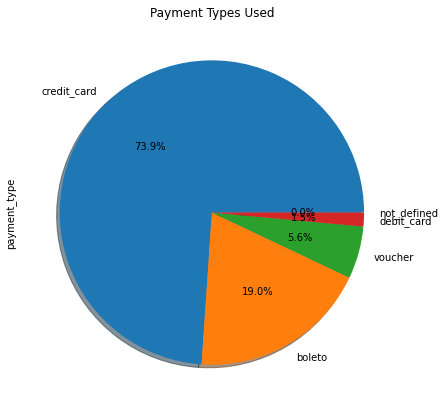

In [79]:
order_payments_dataset['payment_type'].value_counts().plot.pie( figsize=(7, 7),autopct='%1.1f%%' ,
                   shadow=True,title="Payment Types Used")

# Question 5 : 
**Average Orders Values Per Weekday**

In [80]:
#Convert order_purchase_timestamp to weekdays
from datetime import datetime
orders_datase['order_purchase_timestamp'] =  pd.to_datetime(orders_datase['order_purchase_timestamp'],format='%Y-%m-%d')
datetime.date(orders_datase['order_purchase_timestamp'][0]).strftime('%A')
orders_datase['order_purchase_day'] = orders_datase['order_purchase_timestamp'].apply(lambda x : datetime.date(x).strftime('%A'))

Text(0.5, 1.0, 'Average Orders Values Per Weekday')

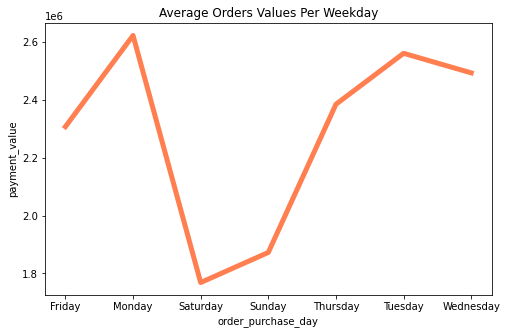

In [81]:
total_order_values = pd.merge (orders_datase,order_payments_dataset,on='order_id',how='left')
total_order_values = total_order_values.groupby('order_purchase_day').sum().reset_index()

rcParams['figure.figsize'] = 8,5
sns.lineplot(x='order_purchase_day', y='payment_value', data=total_order_values, color="coral", linewidth=5,
            markers=True,dashes=False).set_title('Average Orders Values Per Weekday')


# Question 6 : 
**Percentage Of Delayed Delivery**

In [82]:
#convert both (order_delivered_customer_date) & (order_estimated_delivery_date) to datetime
orders_datase['order_delivered_customer_date'] =  pd.to_datetime(orders_datase['order_delivered_customer_date'],format='%Y-%m-%d')
orders_datase['order_estimated_delivery_date'] =  pd.to_datetime(orders_datase['order_estimated_delivery_date'],format='%Y-%m-%d')
#filter by delayed deliveries
delayed_deliveries = orders_datase[orders_datase['order_delivered_customer_date'] > orders_datase['order_estimated_delivery_date']]

number_delayed_deliveries = len(delayed_deliveries.index)
total_number_deliveries = len(orders_datase.index)

print('Percentage of delayed deliveries is :',round(number_delayed_deliveries/total_number_deliveries * 100,2))

Percentage of delayed deliveries is : 7.87


# Question 7 : 
**Customer Segmentation**

In [83]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [84]:
features = pd.merge (orders_datase,order_payments_dataset,on='order_id',how='left')
total_num_orders = features.groupby('customer_id')['order_id'].count().reset_index()
total__orders_value = features.groupby('customer_id')['payment_value'].sum().reset_index()
total__orders_value

customer_id  payment_value
0      00012a2ce6f8dcda20d059ce98491703         114.74
1      000161a058600d5901f007fab4c27140          67.41
2      0001fd6190edaaf884bcaf3d49edf079         195.42
3      0002414f95344307404f0ace7a26f1d5         179.35
4      000379cdec625522490c315e70c7a9fb         107.01
...                                 ...            ...
99436  fffecc9f79fd8c764f843e9951b11341          81.36
99437  fffeda5b6d849fbd39689bb92087f431          63.13
99438  ffff42319e9b2d713724ae527742af25         214.13
99439  ffffa3172527f765de70084a7e53aae8          45.50
99440  ffffe8b65bbe3087b653a978c870db99          18.37

[99441 rows x 2 columns]

In [85]:
paymemt_types = pd.get_dummies(features, columns=['payment_type'])
paymemt_types = paymemt_types.groupby('customer_id')['payment_type_boleto','payment_type_credit_card','payment_type_debit_card','payment_type_not_defined','payment_type_voucher'].sum().reset_index()
paymemt_types

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



customer_id  ...  payment_type_voucher
0      00012a2ce6f8dcda20d059ce98491703  ...                     0
1      000161a058600d5901f007fab4c27140  ...                     0
2      0001fd6190edaaf884bcaf3d49edf079  ...                     0
3      0002414f95344307404f0ace7a26f1d5  ...                     0
4      000379cdec625522490c315e70c7a9fb  ...                     0
...                                 ...  ...                   ...
99436  fffecc9f79fd8c764f843e9951b11341  ...                     2
99437  fffeda5b6d849fbd39689bb92087f431  ...                     0
99438  ffff42319e9b2d713724ae527742af25  ...                     0
99439  ffffa3172527f765de70084a7e53aae8  ...                     0
99440  ffffe8b65bbe3087b653a978c870db99  ...                     0

[99441 rows x 6 columns]

In [86]:
filtered_features = pd.merge(pd.merge(total_num_orders,total__orders_value,on='customer_id'),paymemt_types,on='customer_id')
filtered_features = filtered_features.drop('customer_id',axis=1)
filtered_features

order_id  payment_value  ...  payment_type_not_defined  payment_type_voucher
0             1         114.74  ...                         0                     0
1             1          67.41  ...                         0                     0
2             1         195.42  ...                         0                     0
3             1         179.35  ...                         0                     0
4             1         107.01  ...                         0                     0
...         ...            ...  ...                       ...                   ...
99436         3          81.36  ...                         0                     2
99437         1          63.13  ...                         0                     0
99438         1         214.13  ...                         0                     0
99439         1          45.50  ...                         0                     0
99440         1          18.37  ...                         0                     0

[99441 rows x 7 columns]

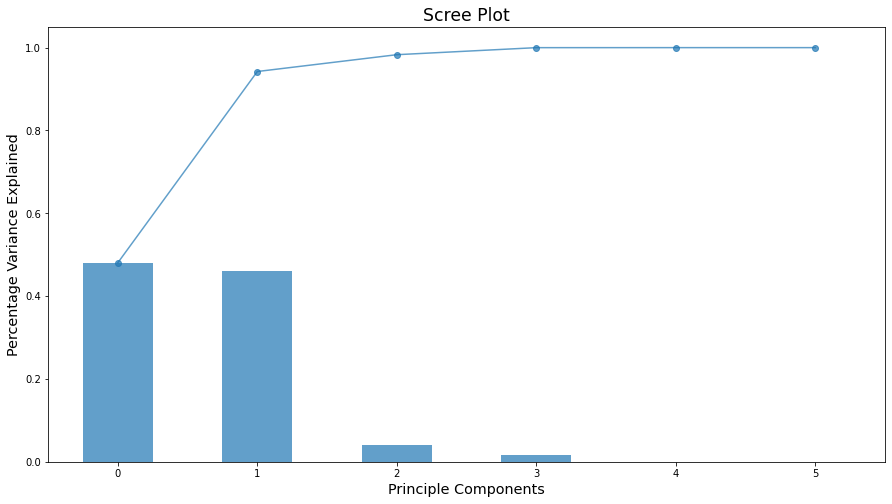

In [87]:
#Feature Selection
X= filtered_features[['order_id' , 'payment_type_boleto','payment_type_credit_card','payment_type_debit_card','payment_type_not_defined','payment_type_voucher']]

pca = PCA()
pca.fit(X)
sns.color_palette("YlOrBr", as_cmap=True)
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component to determine the optimal PCA component number
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7)
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Scree Plot", fontsize="xx-large")
plt.show();

In [88]:
#As seen in the graph above , 3 PCA will preserve 80% of the features
pca = PCA(n_components=3)
X = pca.fit_transform(X)

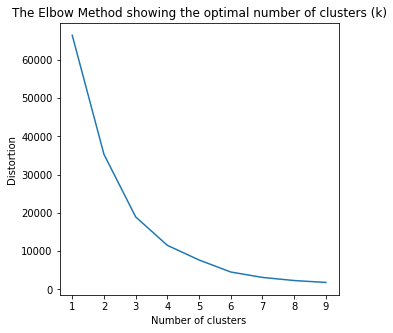

In [89]:
#Elbow Method showing the optimal number of clusters
w = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    w.append(kmeanModel.inertia_)

plt.figure(figsize=(5,5))
plt.plot(K, w)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters (k)')

plt.show()

In [90]:
 #Apply KMeans with n_clusters equales to 4 as seen in the graph above
kmean = KMeans(n_clusters=4)

fit_clusters= kmean.fit_predict(X)

PCA_df=pd.DataFrame(X, columns=['a','b','c']) 
PCA_df['cluster']=pd.Series(fit_clusters)

In [91]:
import plotly.express as px

fig = px.scatter_3d(PCA_df, x= 'a', y= 'b',z = 'c',
                   color='cluster',labels={'x':'PC 1', 'y':'PC 2','z':'PC 3'} )

fig.update_layout(
    autosize=False,
    width=400,
    height=400,)

fig.show()

In [92]:
#Groupby labels to draw conclusions on each label
filtered_features['labels'] = PCA_df['cluster']
filtered_features.groupby('labels').sum()

order_id  payment_value  ...  payment_type_not_defined  payment_type_voucher
labels                           ...                                                
0          76078   1.261532e+07  ...                       3.0                   0.0
1           1143   2.464060e+04  ...                       0.0                1077.0
2          19784   2.869361e+06  ...                       0.0                   0.0
3           6882   4.995453e+05  ...                       0.0                4698.0

[4 rows x 7 columns]